### **Exploratory Data Analysis (EDA)**
#### Teco Customer Churn Analysys
##### Prepared by Feroz Khan

In [2]:
# import necessary/important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customer_Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# to inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**replacing blanks with 0 as tenure is 0 and no total charges are recorded**

In [5]:
# to convert the TotalCharges values to float
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# to find the null values in the dataset
df.isnull().sum()

#overall total null values
# df.isnull().sum().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [9]:
# to find the dulicated values in the dataset
df.duplicated().sum()

0

**to find the duplicated values on the basis of unique column of the data i.e. customerID**

In [10]:
df["customerID"].duplicated().sum()

0

**deal with SeniorCitizen column**
convert 0 = no and 1 = yes values of SeniorCitizen to make it easier for understanding

In [11]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**to deal with Churn Column**
how many customers left the service and how many not left the service

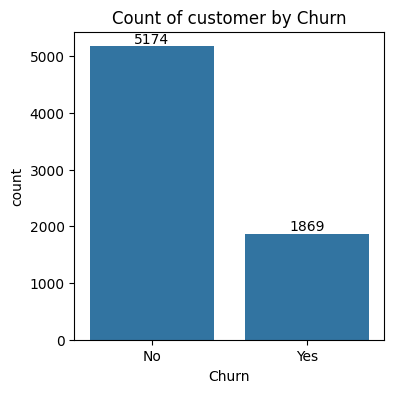

In [14]:
plt.figure(figsize=(4,4))
ax = sns.countplot(data=df, x = 'Churn')

ax.bar_label(ax.containers[0])
plt.title("Count of customer by Churn")
plt.show()

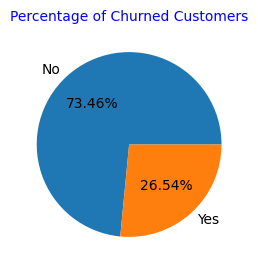

In [15]:
# to show/plot it %age vise using pie chart
plt.figure(figsize=(3,3))
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10, color="blue")
plt.show()

#from the given pie chart we can conclude that 26.54% of customers have churned out

#now let's explore the reason behind it

**Now deal with the gender column**

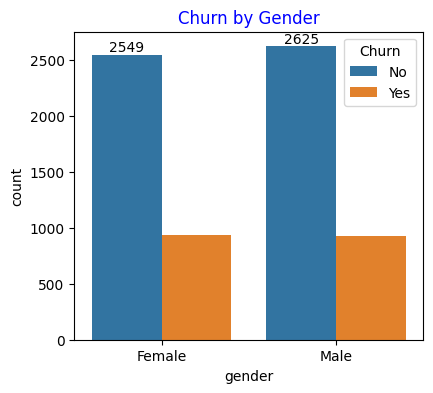

In [16]:
plt.figure(figsize=(4.5,4))
bx = sns.countplot(data=df, x = "gender", hue='Churn')
bx.bar_label(bx.containers[0])
plt.title("Churn by Gender", color="Blue")
plt.show()

**Now deal with SeniorCitizen column**

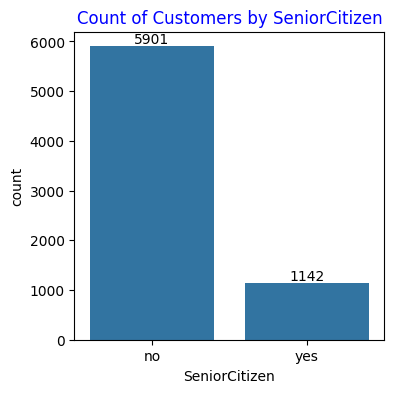

In [17]:
plt.figure(figsize=(4,4))
cs = sns.countplot(data=df, x = 'SeniorCitizen')
cs.bar_label(cs.containers[0])
plt.title("Count of Customers by SeniorCitizen", color="blue")
plt.show()

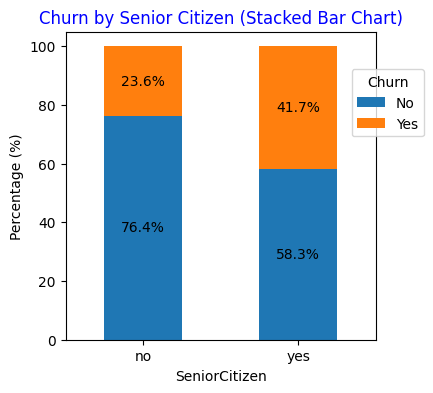

In [18]:
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)', color='blue')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  

plt.show()

#comparatively a greater percentage of people in senior citizen category have churned.

#now deal with tenure column

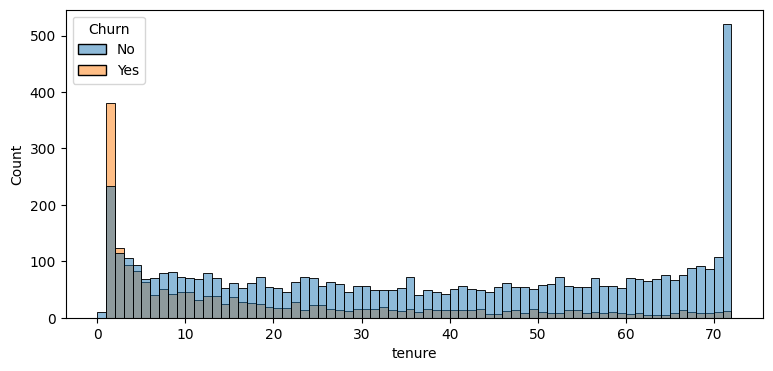

In [19]:
plt.figure(figsize=(9,4))
sns.histplot(data=df, x="tenure", bins=72, hue="Churn")
plt.show()

#people who have used out services for a long time have stayed and people who have used our services #1 or 2 months have churned

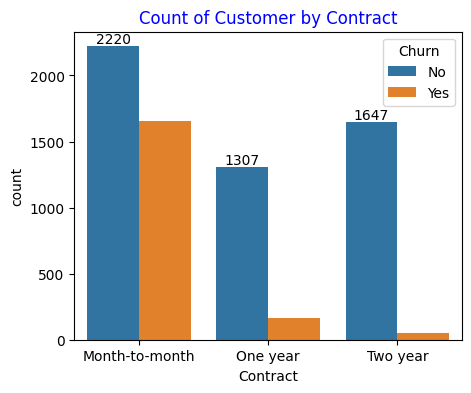

In [20]:
plt.figure(figsize=(5,4))
ac = sns.countplot(data=df, x = "Contract", hue="Churn")
ac.bar_label(ac.containers[0])
plt.title("Count of Customer by Contract", color="blue")
plt.show()



#people who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [21]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

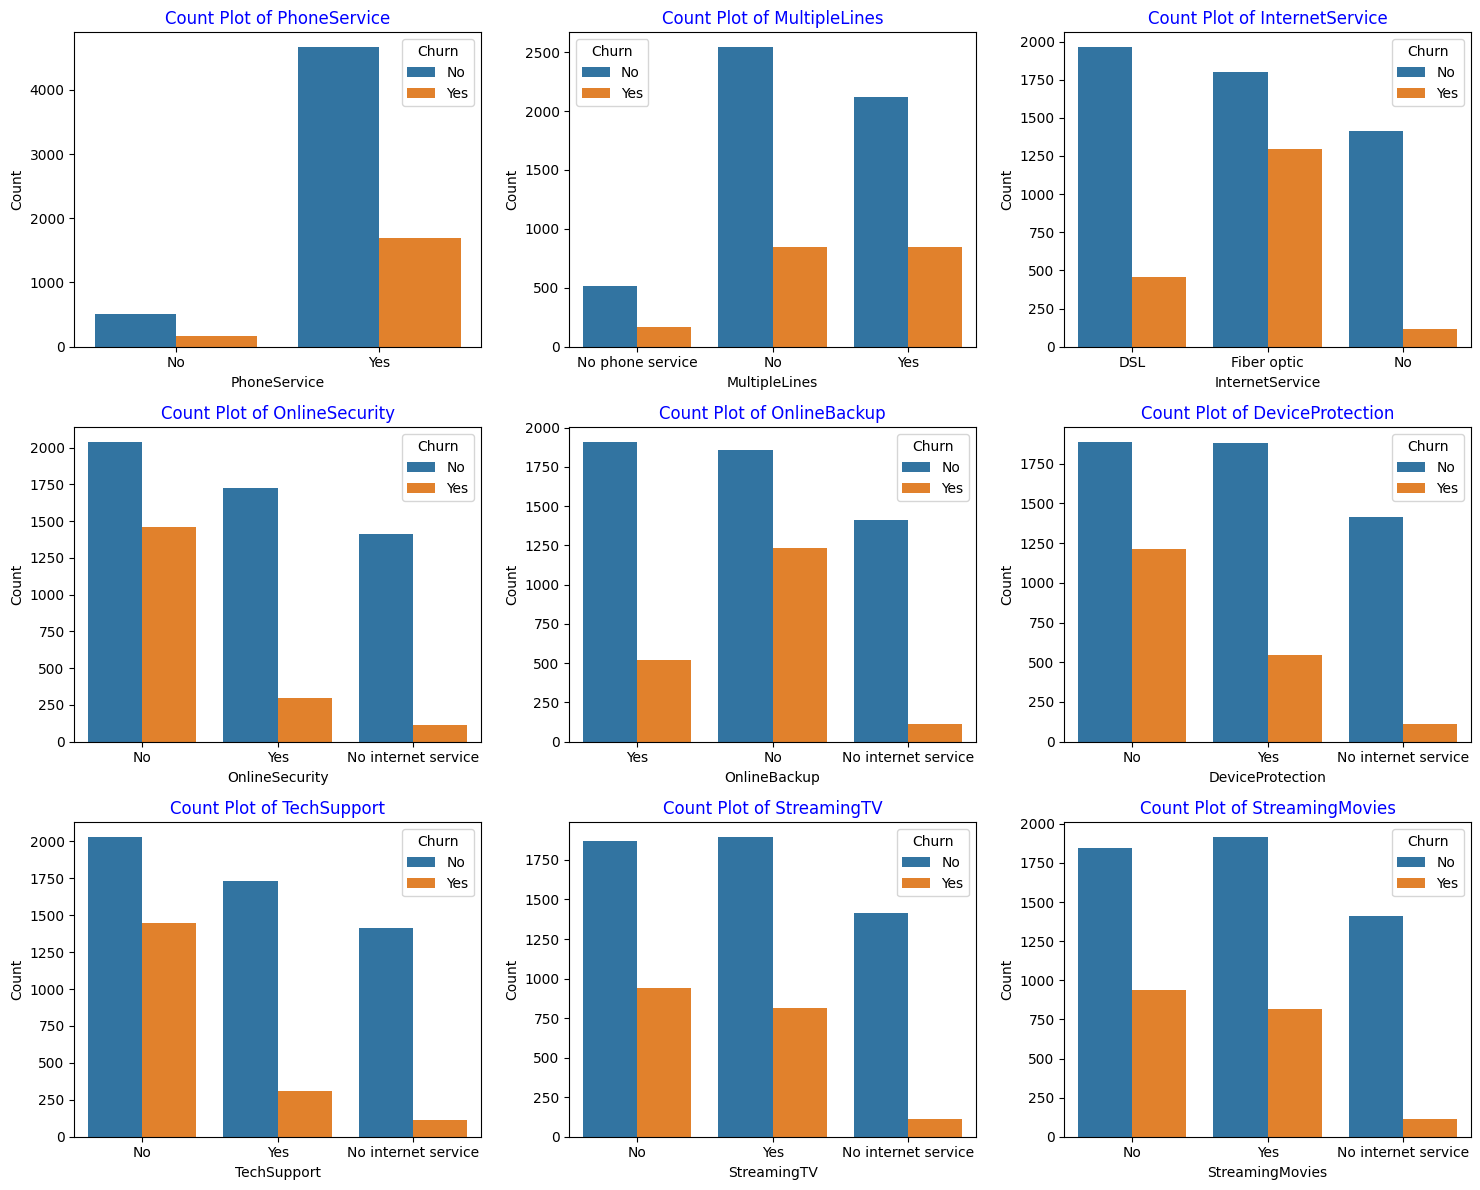

In [22]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}',color='blue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

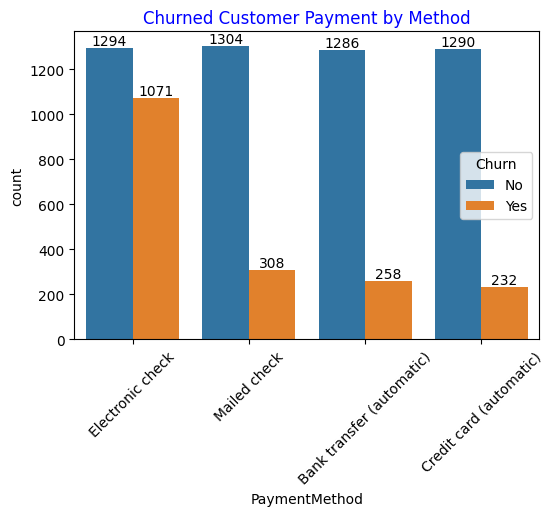

In [23]:
plt.figure(figsize=(6,4))
cp = sns.countplot(data=df, x="PaymentMethod",hue='Churn')
cp.bar_label(cp.containers[0])
cp.bar_label(cp.containers[1])
plt.title("Churned Customer Payment by Method", color="blue")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method. 